# svm 예제 풀이

* alpha를 a0,a1으로 선언

In [1]:
import numpy as np
import sympy as sp

x=np.array([[2,3],[4,1]])
y=np.array([1,-1])

a0,a1=sp.symbols('a:2')
a=np.array([a0,a1])
b=sp.symbols('b')

* Lagrange alphas를 구한다
    * compute Kernels
        * inner product을 계산한다.

In [2]:
def KernelLinear(xi,xj):
    import numpy as np
    return np.inner(xi,xj)

K=KernelLinear(x,x)
print "Kernel={0}".format(K)

Kernel=[[13 11]
 [11 17]]


In [4]:
def getLd(a,y,x,xi):
    Ld1=sum(a) -0.5*sumaayyk(a,y,x,x)
    return Ld1

def sumaayyk(a,y,x,xi):
    import numpy as np
    _sumaayyk=np.array(sum(np.outer(a,a)*np.outer(y,y)*KernelLinear(x,xi)))
    return sum(_sumaayyk)

Ld1=sum(a) -0.5*sumaayyk(a,y,x,x)
print "Ld1={0}".format(Ld1)

Ld1=-6.5*a0**2 + 11.0*a0*a1 + a0 - 8.5*a1**2 + a1


* $\sum \alpha y = 0$ -> a0=a1
* Ld에 대입하고 -> 미분해서 -> 0으로 놓고 해를 구한다.

In [5]:
print "sum of ai*yi=0 --> ",sum(a*y)

sum of ai*yi=0 -->  a0 - a1


In [6]:
Ld1_=Ld1.subs(a0,a1)
print "Ld1_a0=a1 = ",Ld1_

Ld1_a0=a1 =  -4.0*a1**2 + 2*a1


* 미분해서 $\alpha$값을 구한다.

In [7]:
Ld2=sp.diff(Ld1_,a1)
print "Ld2={0}".format(Ld2)
a_=sp.solve(Ld2,a1)
a_1=a_[0]
print a_1

Ld2=-8.0*a1 + 2
0.250000000000000


* a0, a1를 저장한다.

In [8]:
sol_a=[a_1,a_1]
print sol_a

[0.250000000000000, 0.250000000000000]


* $w=\sum \alpha y x$에서 w를 구한다.

In [9]:
def sumayx(alphas,y,x):
    ayxT=alphas*y*x.T
    return ayxT.sum(axis=1)

sol_w=sumayx(np.array(sol_a),y,x)
sumayx(np.array(sol_a),y,x)
print sol_w

[-0.500000000000000 0.500000000000000]


* b의 값은 아래와 같이 구한다.
    $$
        \begin{aligned}
            \sum wx + b &=1\ or -1\\
            y(\sum wx + b) &=1\\
            yb &= 1- y\sum wx\\
            b & = y(1-y\sum wx)
        \end{aligned}
    $$

In [10]:
for xi,yi in zip(x,y):
    b=yi*(1-yi*np.inner(sol_w,xi))
    print b,xi,yi

0.500000000000000 [2 3] 1
0.500000000000000 [4 1] -1


* decision line을 구하면 
    * $w_0 \times x_0 + w_1 \times x_1 + b =0$
    * $ x_1= \frac{-(w_0 \times x_0 + b)}{w_1}$

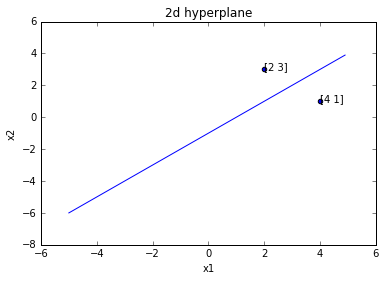

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x1=np.arange(-5,5,0.1)
x2=-(sol_w[0]*x1+b)/sol_w[1]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title('2d hyperplane')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
for i in x:
    ax.text(i[0],i[1],i)
    plt.scatter(i[0],i[1])
plt.plot(x1,x2)
#plt.scatter([0,4],[0,4])
plt.show()
